<a href="https://colab.research.google.com/github/N1khil-J4dhav/College/blob/main/BML_LCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart.csv to heart (1).csv
✅ Data Loaded
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1   
Shape: (303, 14)
Best K=12, Accuracy=86.89%

🎯 Accuracy: 86.88524590163934

               precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86   

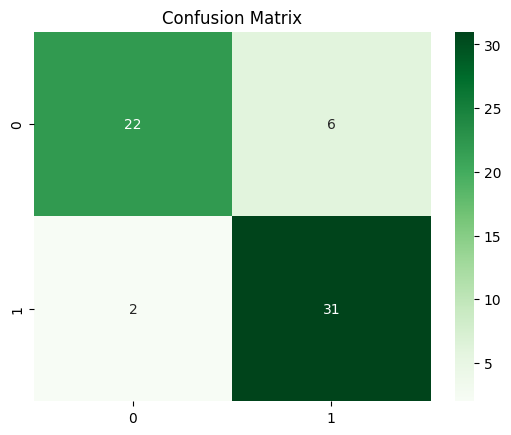

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

df = pd.read_csv(next(iter(files.upload())))
print("Data Loaded\n", df.head(), "\nShape:", df.shape)

target = 'target' if 'target' in df.columns else df.columns[-1]
X, y = df.drop(columns=[target]), df[target]
X_train, X_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(X), y, test_size=0.2, random_state=42, stratify=y
)

scores = [accuracy_score(y_test, KNeighborsClassifier(k).fit(X_train, y_train).predict(X_test)) for k in range(1,21)]
best_k = np.argmax(scores)+1
print(f"Best K={best_k}, Accuracy={max(scores)*100:.2f}%")

knn = KNeighborsClassifier(best_k).fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("\n Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix'); plt.show()
